In [1]:
import assignment.load as load
import assignment.display as display
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = load.load_data(load.DEFAULT_PATH)

In [14]:
from assignment.classify import KNearestNeighbour
nn_fuzzy = KNearestNeighbour(data._raw_data['train_data'], data._raw_data['train_labels'], k=1)
nn_not_fuzzy = KNearestNeighbour(data._raw_data['train_data'], data._raw_data['train_labels'], k=1, fuzzy=False)

In [4]:
import numpy as np

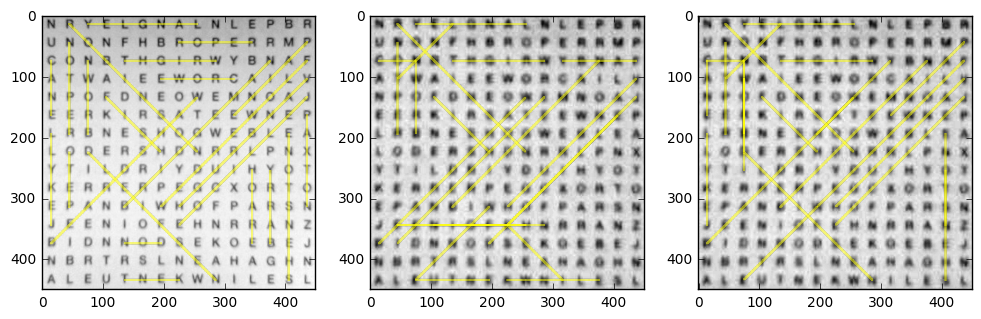

In [15]:
plt.figure(figsize=(12, 12))

plt.subplot(1, 3, 1)
data.wordsearch1.classify(nn_fuzzy)
data.wordsearch1.find_all_and_show(rad=2)

plt.subplot(1, 3, 2)
data.wordsearch2.classify(nn_fuzzy)
data.wordsearch2.find_all_and_show(rad=2)

plt.subplot(1, 3, 3)
data.wordsearch2.classify(nn_not_fuzzy)
data.wordsearch2.find_all_and_show(rad=2)